<a href="https://colab.research.google.com/github/paulasijit/stockmarket/blob/main/closepricepredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM (60 DAY VERSION)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [6]:
#get stock details
df=web.DataReader('PNB.NS', data_source='yahoo', start='2012-01-01', end='2020-12-29')
#show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,156.979996,151.309998,156.979996,153.250000,1423160.0,87.926872
2012-01-03,161.199997,154.380005,155.000000,160.419998,1187425.0,92.040627
2012-01-04,161.490005,158.059998,160.800003,159.720001,1419345.0,91.639015
2012-01-05,167.100006,160.009995,160.800003,165.360001,2077365.0,94.874962
2012-01-06,164.960007,160.600006,164.960007,162.460007,1883455.0,93.211082
...,...,...,...,...,...,...
2020-12-22,34.750000,31.700001,33.849998,33.400002,118459132.0,33.400002
2020-12-23,32.750000,31.700001,32.099998,31.799999,178237037.0,31.799999
2020-12-24,32.599998,31.400000,32.200001,31.450001,111190598.0,31.450001


In [8]:
#show number of data rows and columns
df.shape

(2213, 6)

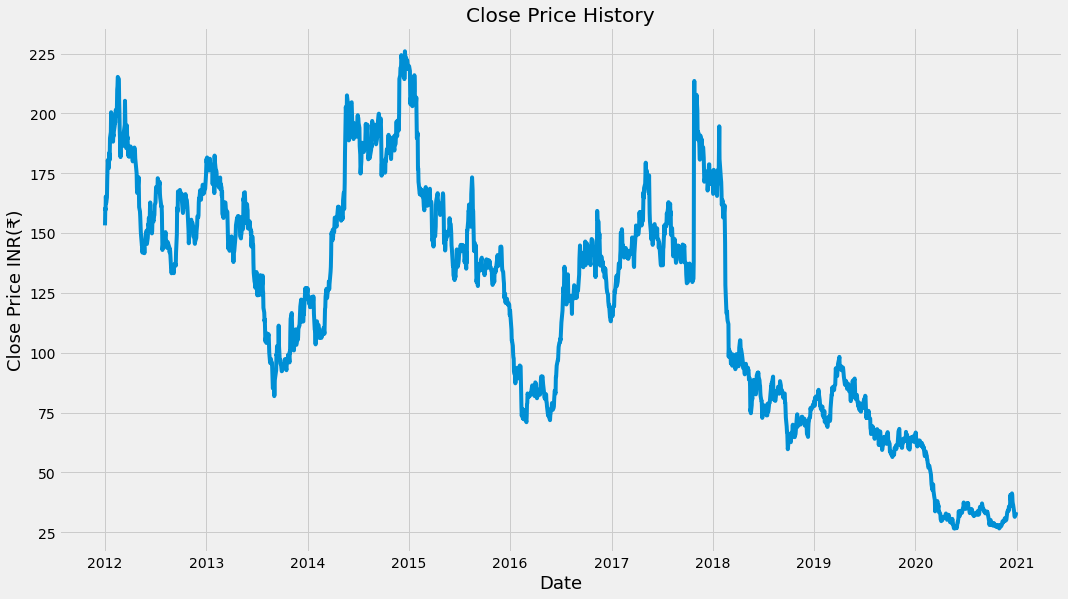

In [11]:
#visualize clossing price
plt.figure(figsize=(16,9))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.show()

In [12]:
#new dataframe with only 'Close'
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1771

In [14]:
#scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.63515547],
       [0.67111333],
       [0.66760281],
       ...,
       [0.02432297],
       [0.02908727],
       [0.03385155]])

In [16]:
#training dataset
train_data=scaled_data[0:training_data_len, :]

X_train = []
Y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    Y_train.append(train_data[i, 0])
    if i<=60:
      print(X_train)
      print(Y_train)
      print()

[array([0.63515547, 0.67111333, 0.66760281, 0.69588767, 0.68134407,
       0.69378136, 0.72898699, 0.74969908, 0.77216654, 0.76414243,
       0.75521566, 0.7869609 , 0.77126379, 0.78109331, 0.81800405,
       0.83059178, 0.87221667, 0.8705617 , 0.84067199, 0.82472419,
       0.81058172, 0.82527585, 0.82226679, 0.83229688, 0.84408226,
       0.85235706, 0.85025075, 0.87016048, 0.87728184, 0.86434301,
       0.88540619, 0.92006017, 0.9264293 , 0.94633903, 0.94157475,
       0.89648947, 0.87236712, 0.83470408, 0.7782347 , 0.82076226,
       0.82276832, 0.81810429, 0.82316954, 0.81048148, 0.80270814,
       0.80170515, 0.82718151, 0.84057175, 0.84583748, 0.8962387 ,
       0.86629888, 0.83294886, 0.79684055, 0.82758272, 0.8445336 ,
       0.8146941 , 0.8209127 , 0.7806921 , 0.79468404, 0.78164497])]
[0.7788866779225743]



In [19]:
#convert to np array
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [20]:
#reshape
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1711, 60, 1)

In [23]:
#LSTM Model
model=Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
#Train the model
model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
54/54 [==============================] - 6s 46ms/step - loss: 0.0397
Epoch 2/100
54/54 [==============================] - 3s 53ms/step - loss: 0.0024
Epoch 3/100
54/54 [==============================] - 3s 57ms/step - loss: 0.0019
Epoch 4/100
54/54 [==============================] - 3s 59ms/step - loss: 0.0018
Epoch 5/100
54/54 [==============================] - 3s 51ms/step - loss: 0.0018
Epoch 6/100
54/54 [==============================] - 3s 51ms/step - loss: 0.0016
Epoch 7/100
54/54 [==============================] - 3s 53ms/step - loss: 0.0013
Epoch 8/100
54/54 [==============================] - 3s 51ms/step - loss: 0.0013
Epoch 9/100
54/54 [==============================] - 3s 50ms/step - loss: 0.0012
Epoch 10/100
54/54 [==============================] - 3s 50ms/step - loss: 0.0011
Epoch 11/100
54/54 [==============================] - 3s 50ms/step - loss: 0.0010
Epoch 12/100
54/54 [==============================] - 3s 50ms/step - loss: 0.0011
Epoch 13/100
54/54 [=====

In [27]:
#Create testing datset
test_data=scaled_data[training_data_len - 60:, :]
#create x_test, y_test
X_test=[]
Y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [30]:
#convert data to np array
X_test= np.array(X_test)

In [32]:
#reshape
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
#get prediction
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

In [37]:
#root  mean square error(RMSE)
rmse=np.sqrt(np.mean(predictions-Y_test)**2)
rmse

0.3835932960337643

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


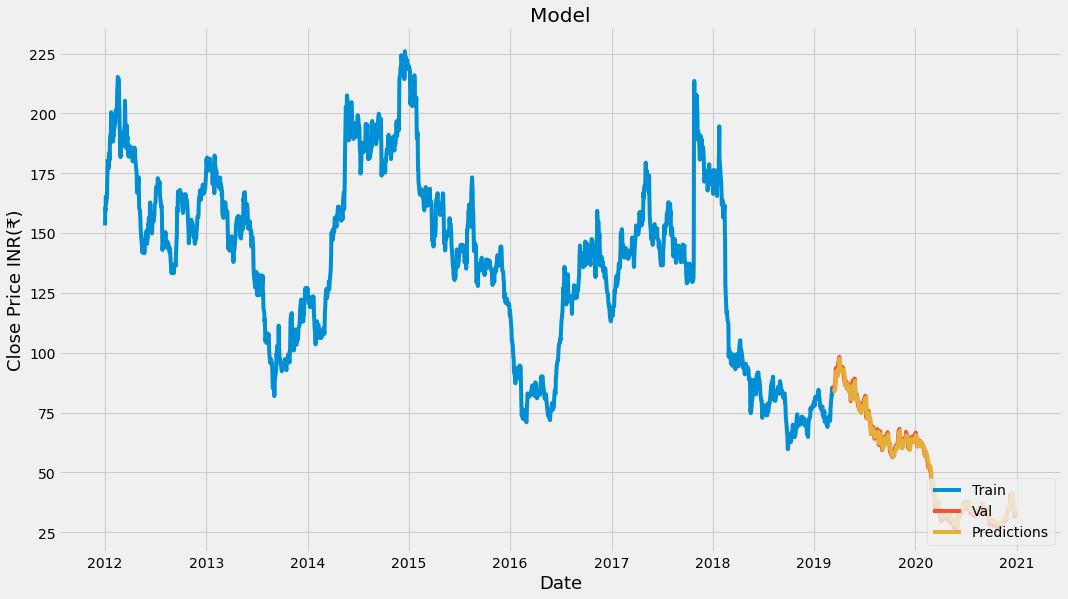

In [39]:
#Plot train data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
#show valid and predicted price
valid

,Close,Predictions
Date,,
2019-03-12,85.400002,84.949097
2019-03-13,84.849998,84.864510
2019-03-14,84.449997,84.362274
2019-03-15,86.050003,83.904457
2019-03-18,86.650002,85.085785
...,...,...
2020-12-22,33.400002,36.185501
2020-12-23,31.799999,35.070938
2020-12-24,31.450001,33.804951


In [42]:
#get quote
stock_quote=web.DataReader('PNB.NS', data_source='yahoo', start='2012-01-01', end='2020-12-29')
#new dataframe
new_df=stock_quote.filter(['Close'])
#get last 60days
last_60_day=new_df[-60:].values
#scale
last_60_day_scaled=scaler.transform(last_60_day)
#empty list
X_test=[]
#Append the past 60days
X_test.append(last_60_day_scaled)
#convert the X_test data set to np array
X_test=np.array(X_test)
#Reshape
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price=model.predict(X_test)
#undo scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[33.77205]]


In [44]:
#get acctual
stock_quote_org=web.DataReader('PNB.NS', data_source='yahoo', start='2020-12-29', end='2020-12-29')
print(stock_quote_org['Close'])

Date
2020-12-29    33.349998
Name: Close, dtype: float64
